In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,AveragePooling2D
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10

# RGB cifar10

In [24]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### limit to 4 classes

In [27]:
nb_classes = 4
n_samples = 7000

In [28]:
X_train = X_train[np.where(y_train<4)[0]]
y_train = y_train[np.where(y_train<4)[0]]

In [29]:
X_train.shape

(20000, 32, 32, 3)

In [30]:
X_train = X_train[:n_samples]
y_train = y_train[:n_samples]

In [31]:
X_test = X_test[np.where(y_test<4)[0]]
y_test = y_test[np.where(y_test<4)[0]]

In [32]:
X_train.shape

(7000, 32, 32, 3)

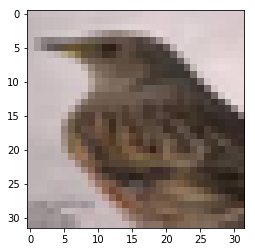

In [33]:
plt.imshow(X_train[6])
plt.show()

### Rescaling to smaller values

In [34]:
X_train = X_train/255
X_test = X_test/255

In [35]:
X_test.shape

(4000, 32, 32, 3)

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### One-layer network with maxpooling

Filter : 32 with kernel 3x3, same padding, activation relu, subsampling: sqare 2x2

In [22]:
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3),padding='same'))
model1 = Sequential()
model1.add(feature_extractor)
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(4,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 32772     
Total params: 33,668
Trainable params: 33,668
Non-trainable params: 0
_________________________________________________________________


In [37]:
model1.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 5250 samples, validate on 1750 samples
Epoch 1/100
 - 6s - loss: 1.0466 - acc: 0.5571 - val_loss: 0.8733 - val_acc: 0.6771
Epoch 2/100
 - 5s - loss: 0.7747 - acc: 0.7048 - val_loss: 0.8028 - val_acc: 0.6777
Epoch 3/100
 - 5s - loss: 0.6728 - acc: 0.7343 - val_loss: 0.7381 - val_acc: 0.7126
Epoch 4/100
 - 5s - loss: 0.6175 - acc: 0.7579 - val_loss: 0.7146 - val_acc: 0.7274
Epoch 5/100
 - 6s - loss: 0.5832 - acc: 0.7810 - val_loss: 0.6945 - val_acc: 0.7229
Epoch 6/100
 - 6s - loss: 0.5537 - acc: 0.7886 - val_loss: 0.7027 - val_acc: 0.7314
Epoch 7/100
 - 7s - loss: 0.5158 - acc: 0.8044 - val_loss: 0.6890 - val_acc: 0.7297
Epoch 8/100
 - 6s - loss: 0.4887 - acc: 0.8131 - val_loss: 0.6458 - val_acc: 0.7480
Epoch 9/100
 - 7s - loss: 0.4658 - acc: 0.8274 - val_loss: 0.6658 - val_acc: 0.7389
Epoch 10/100
 - 6s - loss: 0.4549 - acc: 0.8299 - val_loss: 0.6492 - val_acc: 0.7434
Epoch 11/100
 - 8s - loss: 0.4323 - acc: 0.8392 - val_loss: 0.6821 - val_acc: 0.7360


In [38]:
print(model1.evaluate(X_train,y_train))
print(model1.evaluate(X_test,y_test))

7000/7000 [==============================] - 5s 773us/step
[0.48901857376098634, 0.8134285713604519]
4000/4000 [==============================] - 3s 710us/step
[0.6561691768169403, 0.752]


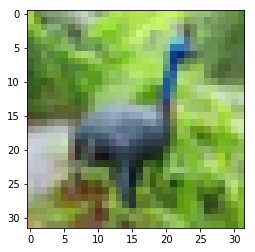

In [39]:
plt.imshow(X_train[2])
plt.show()

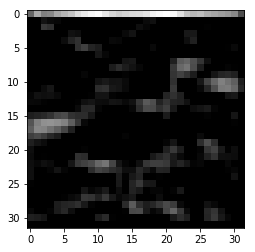

In [44]:
post_conv_pred = feature_extractor.predict(X_train[:3])
plt.imshow(post_conv_pred[2,:,:,1],cmap='gray')
plt.show()

### Add dense layer

In [45]:
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32,(5,5),activation='relu',input_shape = (32,32,3),padding='same'))
model2 = Sequential()
model2.add(feature_extractor)
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(200,activation='relu'))
model2.add(Dense(4,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               1638600   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 804       
Total params: 1,641,836
Trainable params: 1,641,836
Non-trainable params: 0
_________________________________________________________________


In [46]:
model2.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 5250 samples, validate on 1750 samples
Epoch 1/100
 - 16s - loss: 0.9717 - acc: 0.6010 - val_loss: 0.8327 - val_acc: 0.6509
Epoch 2/100
 - 17s - loss: 0.6831 - acc: 0.7362 - val_loss: 0.7563 - val_acc: 0.7051
Epoch 3/100
 - 14s - loss: 0.5915 - acc: 0.7716 - val_loss: 0.6892 - val_acc: 0.7303
Epoch 4/100
 - 16s - loss: 0.5270 - acc: 0.7952 - val_loss: 0.6921 - val_acc: 0.7303
Epoch 5/100
 - 15s - loss: 0.4553 - acc: 0.8265 - val_loss: 0.6674 - val_acc: 0.7457
Epoch 6/100
 - 14s - loss: 0.3884 - acc: 0.8539 - val_loss: 0.8450 - val_acc: 0.7011
Epoch 7/100
 - 13s - loss: 0.3515 - acc: 0.8720 - val_loss: 0.6768 - val_acc: 0.7651
Epoch 8/100
 - 13s - loss: 0.2770 - acc: 0.8960 - val_loss: 0.7473 - val_acc: 0.7526


In [47]:
print(model2.evaluate(X_train,y_train))
print(model2.evaluate(X_test,y_test))

7000/7000 [==============================] - 10s 1ms/step
[0.34071148330824713, 0.8868571429252624]
4000/4000 [==============================] - 6s 2ms/step
[0.7721961872577667, 0.75075]


### Two-layer network with maxpooling

In [106]:
model3 = Sequential()
model3.add((Conv2D(32,(5,5),activation='relu',input_shape = (32,32,3),padding='same')))
model3.add(MaxPooling2D())
model3.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(200,activation='relu'))
model3.add(Dense(4,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 200)               819400    
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 804       
Total para

In [107]:
model3.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 5250 samples, validate on 1750 samples
Epoch 1/100
 - 24s - loss: 0.9988 - acc: 0.5760 - val_loss: 0.8527 - val_acc: 0.6617
Epoch 2/100
 - 24s - loss: 0.7377 - acc: 0.7029 - val_loss: 0.8198 - val_acc: 0.6640
Epoch 3/100
 - 16s - loss: 0.6385 - acc: 0.7509 - val_loss: 0.6361 - val_acc: 0.7514
Epoch 4/100
 - 16s - loss: 0.5616 - acc: 0.7810 - val_loss: 0.6270 - val_acc: 0.7600
Epoch 5/100
 - 17s - loss: 0.5043 - acc: 0.8015 - val_loss: 0.6215 - val_acc: 0.7503
Epoch 6/100
 - 21s - loss: 0.4449 - acc: 0.8230 - val_loss: 0.7050 - val_acc: 0.7297
Epoch 7/100
 - 18s - loss: 0.3841 - acc: 0.8514 - val_loss: 0.6965 - val_acc: 0.7520
Epoch 8/100
 - 20s - loss: 0.3225 - acc: 0.8756 - val_loss: 0.6430 - val_acc: 0.7691


In [108]:
print(model3.evaluate(X_train,y_train))

7000/7000 [==============================] - 14s 2ms/step
[0.3607810848099845, 0.8672857142857143]


In [109]:
print(model3.evaluate(X_test,y_test))

4000/4000 [==============================] - 8s 2ms/step
[0.6673524422645569, 0.7535]


### Two-layer network with dropout on hidden layer

In [111]:
model4 = Sequential()
model4.add(Conv2D(32,(5,5),activation='relu',input_shape = (32,32,3),padding='same'))
model4.add(MaxPooling2D())
model4.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model4.add(MaxPooling2D())
model4.add(Flatten())
model4.add(Dense(200,activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(4,activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 200)               819400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
__________

In [112]:
model4.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 5250 samples, validate on 1750 samples
Epoch 1/100
 - 19s - loss: 1.0288 - acc: 0.5577 - val_loss: 0.8906 - val_acc: 0.6291
Epoch 2/100
 - 15s - loss: 0.7827 - acc: 0.6779 - val_loss: 0.7058 - val_acc: 0.7183
Epoch 3/100
 - 17s - loss: 0.6608 - acc: 0.7389 - val_loss: 0.6588 - val_acc: 0.7400
Epoch 4/100
 - 16s - loss: 0.6015 - acc: 0.7627 - val_loss: 0.6373 - val_acc: 0.7486
Epoch 5/100
 - 17s - loss: 0.5619 - acc: 0.7840 - val_loss: 0.6035 - val_acc: 0.7560
Epoch 6/100
 - 20s - loss: 0.4990 - acc: 0.8046 - val_loss: 0.5855 - val_acc: 0.7743
Epoch 7/100
 - 16s - loss: 0.4488 - acc: 0.8290 - val_loss: 0.7509 - val_acc: 0.7303
Epoch 8/100
 - 16s - loss: 0.4727 - acc: 0.8185 - val_loss: 0.6182 - val_acc: 0.7686
Epoch 9/100
 - 15s - loss: 0.3844 - acc: 0.8507 - val_loss: 0.6057 - val_acc: 0.7783


In [113]:
print(model4.evaluate(X_train,y_train))

7000/7000 [==============================] - 14s 2ms/step
[0.36781838297843933, 0.8701428570747376]


In [114]:
print(model4.evaluate(X_test,y_test))

4000/4000 [==============================] - 8s 2ms/step
[0.5990896053314209, 0.7725]


### LeNet Network

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

In [55]:
model5 = Sequential()
model5.add(Conv2D(6,(5,5),activation='relu',input_shape = (32,32,3),padding='valid'))
model5.add(MaxPooling2D())
model5.add(Conv2D(16,(5,5),activation='relu',padding='valid'))
model5.add(MaxPooling2D())
model5.add(Flatten())
model5.add(Dense(120,activation='relu'))
model5.add(Dense(84,activation='relu'))
model5.add(Dense(4,activation='softmax'))
model5.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_9 (Dense)              (None, 84)                10164     
__________

In [56]:
model5.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 5250 samples, validate on 1750 samples
Epoch 1/100
 - 9s - loss: 1.0655 - acc: 0.5278 - val_loss: 1.0344 - val_acc: 0.5589
Epoch 2/100
 - 7s - loss: 0.8207 - acc: 0.6623 - val_loss: 0.8391 - val_acc: 0.6343
Epoch 3/100
 - 8s - loss: 0.7661 - acc: 0.6821 - val_loss: 0.8184 - val_acc: 0.6634
Epoch 4/100
 - 7s - loss: 0.7199 - acc: 0.7107 - val_loss: 0.7872 - val_acc: 0.6783
Epoch 5/100
 - 7s - loss: 0.6702 - acc: 0.7240 - val_loss: 0.7882 - val_acc: 0.6886
Epoch 6/100
 - 7s - loss: 0.6234 - acc: 0.7556 - val_loss: 0.7284 - val_acc: 0.7040
Epoch 7/100
 - 8s - loss: 0.5851 - acc: 0.7610 - val_loss: 0.7303 - val_acc: 0.7114
Epoch 8/100
 - 7s - loss: 0.5896 - acc: 0.7648 - val_loss: 0.6878 - val_acc: 0.7240
Epoch 9/100
 - 7s - loss: 0.5119 - acc: 0.8004 - val_loss: 0.6963 - val_acc: 0.7354
Epoch 10/100
 - 7s - loss: 0.4700 - acc: 0.8141 - val_loss: 0.7395 - val_acc: 0.7291
Epoch 11/100
 - 7s - loss: 0.4458 - acc: 0.8242 - val_loss: 0.7473 - val_acc: 0.7189


In [57]:
print(model5.evaluate(X_train,y_train))
print(model5.evaluate(X_test,y_test))

7000/7000 [==============================] - 7s 1ms/step
[0.5025616502080645, 0.811571428503309]
4000/4000 [==============================] - 4s 1ms/step
[0.7307122507095337, 0.728]


### Image augmentation 

In [58]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=(0.1),
    height_shift_range=(0.1),
    horizontal_flip=True
)

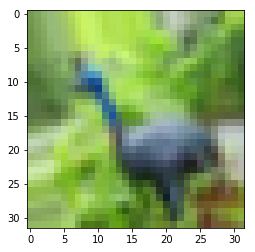

In [60]:
plt.imshow(datagen.random_transform(X_train[2]))
plt.show()

In [64]:
model6 = Sequential()
model6.add(Conv2D(32,(5,5),activation='relu',input_shape = (32,32,3),padding='same'))
model6.add(MaxPooling2D())
model6.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model6.add(MaxPooling2D())
model6.add(Flatten())
model6.add(Dense(200,activation='relu'))
model6.add(Dropout(0.4))
model6.add(Dense(4,activation='softmax'))
model6.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               819400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
__________

### extract validation set from train set

In [61]:
X_train_g, X_valid_g,y_train_g,y_valid_g = train_test_split(X_train,y_train,test_size=0.25)

In [62]:
X_train.shape, X_valid_g.shape

((7000, 32, 32, 3), (1750, 32, 32, 3))

In [67]:
model6.fit_generator(datagen.flow(X_train_g,y_train_g,batch_size=32),
                     validation_data=(X_valid_g,y_valid_g),
                     callbacks=[early_stopping],
                     epochs=100,
                     steps_per_epoch=X_train_g.shape[0]//32,
                     verbose=2
                    )

Epoch 1/100
 - 20s - loss: 0.8064 - acc: 0.6791 - val_loss: 0.7606 - val_acc: 0.6954
Epoch 2/100
 - 20s - loss: 0.7741 - acc: 0.6877 - val_loss: 0.6719 - val_acc: 0.7326
Epoch 3/100
 - 22s - loss: 0.7299 - acc: 0.7108 - val_loss: 0.6302 - val_acc: 0.7537
Epoch 4/100
 - 24s - loss: 0.7007 - acc: 0.7249 - val_loss: 0.5710 - val_acc: 0.7829
Epoch 5/100
 - 29s - loss: 0.6845 - acc: 0.7321 - val_loss: 0.6544 - val_acc: 0.7394
Epoch 6/100
 - 23s - loss: 0.6628 - acc: 0.7416 - val_loss: 0.5643 - val_acc: 0.7771
Epoch 7/100
 - 24s - loss: 0.6702 - acc: 0.7315 - val_loss: 0.5777 - val_acc: 0.7863
Epoch 8/100
 - 27s - loss: 0.6286 - acc: 0.7519 - val_loss: 0.5810 - val_acc: 0.7754
Epoch 9/100
 - 29s - loss: 0.6108 - acc: 0.7553 - val_loss: 0.5790 - val_acc: 0.7720


In [68]:
print(model6.evaluate(X_train,y_train))
print(model6.evaluate(X_test,y_test))

7000/7000 [==============================] - 13s 2ms/step
[0.5228874061107636, 0.7957142856461661]
4000/4000 [==============================] - 8s 2ms/step
[0.5839243624210357, 0.76525]


In [129]:
y_pred_prob = model6.predict(X_test)

In [131]:
y_pred = np.zeros(shape=y_pred_prob.shape)

In [134]:
[i[np.argmax(probs)] = 1 for i,probs in zip(y_pred,y_pred_prob)]

SyntaxError: invalid syntax (<ipython-input-134-ebac7c5d4d61>, line 1)

In [130]:
np.argmax(y_pred_prob[0])

3

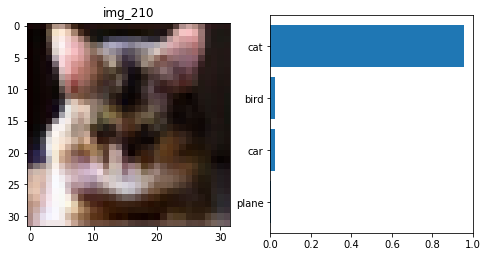

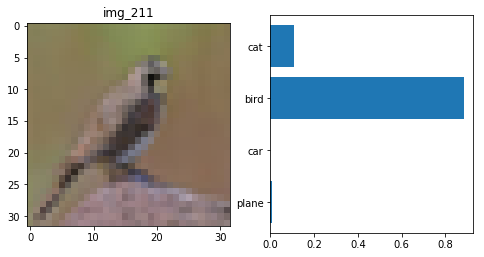

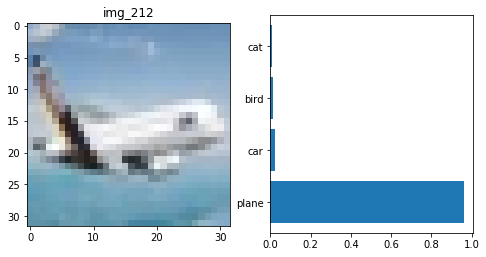

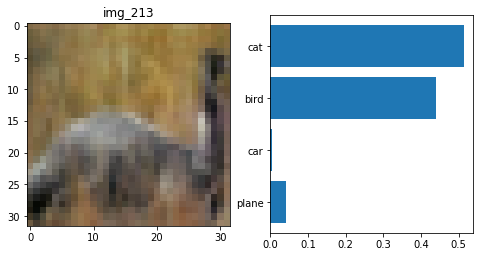

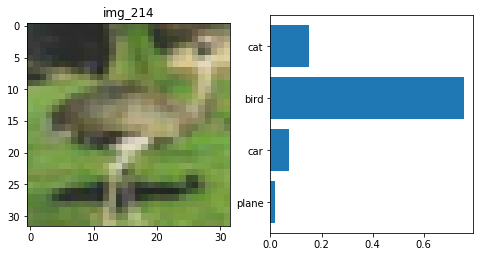

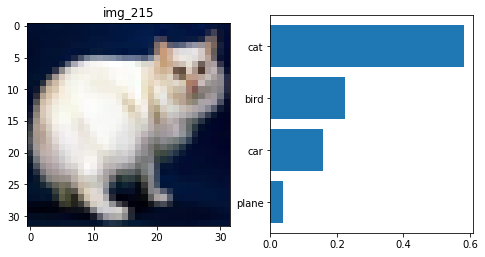

In [116]:
min_sample = 210
max_sample = 216
n_samples = max_sample - min_sample

predictions = model6.predict(X_test[min_sample:max_sample])
y_range = np.arange(0,4,step=1)
y_label = ['plane','car','bird','cat']

for i,img in enumerate(range(min_sample,max_sample)):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title('img_'+ str(img))
    plt.imshow(X_test[img])
    plt.subplot(1,2,2)
    plt.barh(y = y_label,width=predictions[i])
    plt.show()